# Capstone: Snow Prediction Project
## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [3]:
#load data
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data/snow_data_cleaned.csv'
snow_data = pd.read_csv(file_path)

In [5]:
snow_data.shape

(12429, 77)

In [6]:
snow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12429 entries, 0 to 12428
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  12429 non-null  object 
 1   station_name          12429 non-null  object 
 2   elevation             12429 non-null  int64  
 3   latitude              12429 non-null  float64
 4   longitude             12429 non-null  float64
 5   snowdepth             12429 non-null  float64
 6   precip_accumulation   12429 non-null  float64
 7   precip_increment      12429 non-null  float64
 8   airtemp_avg           12429 non-null  float64
 9   airtemp_max           12429 non-null  float64
 10  airtemp_min           12429 non-null  float64
 11  airtemp_obs           12429 non-null  float64
 12  soiltemp_obs          12429 non-null  float64
 13  soilmoisture_avg      12429 non-null  float64
 14  soilmoisture_max      12429 non-null  float64
 15  soilmoisture_min   

## Step 1: Explore each variable

#### Explore data by station 

In [7]:
avg_snow_depth_station= snow_data.groupby('station_name')['snowdepth'].mean()
print(avg_snow_depth_station)

station_name
Brighton             20.605911
Dry Fork             14.387521
Mill Creek Canyon     4.984615
Mill-D North         22.810619
Powder Mountain      28.857704
Name: snowdepth, dtype: float64


Powder Mtn shows a large lead in the average mean of snow depth

In [8]:
elevation_station= snow_data.groupby('station_name')['elevation'].mean()
print(elevation_station)

station_name
Brighton             8790.0
Dry Fork             7190.0
Mill Creek Canyon    6960.0
Mill-D North         8940.0
Powder Mountain      8490.0
Name: elevation, dtype: float64


In [9]:
avg_precip_station= snow_data.groupby('station_name')['precip_accumulation'].mean()
print(avg_precip_station)

station_name
Brighton             23.108101
Dry Fork             17.297126
Mill Creek Canyon     3.465128
Mill-D North         23.188314
Powder Mountain      24.607311
Name: precip_accumulation, dtype: float64


Pwder Mtn again has the similar precipitation but averagely more snow depth, could another feature or variable interaction be the cause? 

In [10]:
avg_airtemp_station= snow_data.groupby('station_name')['airtemp_obs'].mean()
print(avg_airtemp_station)

station_name
Brighton             36.326683
Dry Fork             38.754625
Mill Creek Canyon    41.554359
Mill-D North         37.757334
Powder Mountain      39.010849
Name: airtemp_obs, dtype: float64


The average air temperatures are similar: could indicate consistency in snowfall drivers, maybe predictability of snow depth, and influence of non-temperature factors.

In [11]:
#Location data of snow depth by each station
station_description = snow_data.groupby('station_name')['snowdepth'].describe()

mode = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

station_description['mode'] = mode
station_description['iqr'] = iqr

print(station_description)

print()
print(f"Spread Statistics:")
#Spread Statistics 
std_dev = snow_data.groupby('station_name')['snowdepth'].std()
variance = snow_data.groupby('station_name')['snowdepth'].var()
value_range = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.max() - x.min())
iqr_range = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
print()
print(f"Standard Devivation of Snow Depth for each Station: {std_dev}")
print()
print(f"Variance of Snow Depth for each Station: {variance}")
print()
print(f"Value Range of Snow Depth for each Station: {value_range}")
print()
print(f"Interqurtile Range Snow Depth for each Station: {iqr_range}")

print()
print()
print(f"Shape Statistics:")
#Shape Statistics 
skewness = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.skew())
kurtosis = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.kurt())

print()
print(f"Skewness of Snowdepth for each Station:")
print(skewness)
print()
print(f"Kurtosis of Snowdepth for each Station:")
print(kurtosis)
#Describes the shape of distribution's tails in relation to its overall shape


                    count       mean        std  min  25%  50%   75%    max  \
station_name                                                                  
Brighton           3654.0  20.605911  25.590131  0.0  0.0  6.0  37.0  122.0   
Dry Fork           3654.0  14.387521  18.978090  0.0  0.0  1.0  27.0   98.0   
Mill Creek Canyon   195.0   4.984615   8.214569  0.0  0.0  0.0   8.0   29.0   
Mill-D North       3654.0  22.810619  28.538768  0.0  0.0  7.0  41.0  155.0   
Powder Mountain    1272.0  28.857704  35.025822  0.0  0.0  9.0  51.0  155.0   

                   mode   iqr  
station_name                   
Brighton            0.0  37.0  
Dry Fork            0.0  27.0  
Mill Creek Canyon   0.0   8.0  
Mill-D North        0.0  41.0  
Powder Mountain     0.0  51.0  

Spread Statistics:

Standard Devivation of Snow Depth for each Station: station_name
Brighton             25.590131
Dry Fork             18.978090
Mill Creek Canyon     8.214569
Mill-D North         28.538768
Powder Mount

## Issues with the Dataset

### 1. Shape
- **Data Points**: Stations like **Brighton**, **Dry Fork**, and **Mill-D North** have significantly more data points compared to **Mill Creek Canyon** and **Powder Mountain**. This might affect the reliability of statistical analyses for smaller datasets like Mill Creek Canyon.
- **Mode**: The mode for snow depth is **0.0** for all stations, indicating that no snow (or very low snow) is the most frequent observation at each station.
  - **Suggestion**: Consider using only **winter months**, as the inclusion of summer months (with no snow) could skew the data.

---

### 2. Spread Statistics
- **Standard Deviation and Variance**: 
  - **Powder Mountain** and **Mill-D North** show the **highest variability** in snow depth, suggesting these locations experience more fluctuations.
  - **Mill Creek Canyon** has much **lower variability**.
- **Range**: 
  - **Mill-D North** and **Powder Mountain** have the **largest range** of snow depths (155.0), reflecting high extremes.
  - **Mill Creek Canyon** has the **smallest range** (29.0).
- **Interquartile Range (IQR)**: 
  - **Powder Mountain** and **Mill-D North** also show **higher IQR** values, signaling greater spread in middle-range snow depth values.
  - **Mill Creek Canyon** remains the **least varied**.

---

### 3. Shape Statistics
- **Skewness**: 
  - All stations have **positive skewness**, meaning the snow depth data is **right-skewed** (more frequent low values and fewer high values).
  - **Suggestion**: Isolate **winter months** to reduce the impact of non-snow periods.
- **Kurtosis**: 
  - Most stations have kurtosis **near or below zero**, indicating a normal snow depth distribution.
  - **Exception**: **Mill-D North** has a kurtosis of **1.25**, suggesting potential outlier-prone behavior.

---


In [6]:
#Exclude Millcreek from the analysis due to the smaller sample size and its potential to skew the statistical results
#Powder Mtn as well since monitoring at that site doesn't include the range or extent to other stations involved in dataset.
snow_data = snow_data[snow_data['station_name'] != 'Mill Creek Canyon']
snow_data = snow_data[snow_data['station_name'] != 'Powder Mountain']

In [ ]:
#Exploring data by date (month, year)

In [8]:
snow_data['date'] = pd.to_datetime(snow_data['date'])
snow_data['month'] = snow_data['date'].dt.month
snow_data['year'] = snow_data['date'].dt.year

In [21]:
#Location data of snow depth by month and year
month_description = snow_data.groupby('month')['snowdepth'].describe()

mode = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('month')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

month_description['mode'] = mode
month_description['iqr'] = iqr
print("Summary statistics of Snow Depth for Months:")
print(month_description)
print()
year_description = snow_data.groupby('year')['snowdepth'].describe()

mode = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('year')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

year_description['mode'] = mode
year_description['iqr'] = iqr
print("Summary statistics of Snow Depth for Years:")
print(year_description)


#Shape Statistics for Year, Month
skewness_month = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.skew())
kurtosis_month = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.kurt())
print()
print()
print(f"Skewness of Snowdepth for Month:")
print(skewness_month)
print()
print(f"Kurtosis of Snowdepth for Month:")
print(kurtosis_month)
print()

skewness_year = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.skew())
kurtosis_year = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.kurt())
print()
print(f"Skewness of Snowdepth for Year:")
print(skewness_year)
print()
print(f"Kurtosis of Snowdepth for Year:")
print(kurtosis_year)

Summary statistics of Snow Depth for Months:
       count       mean        std   min   25%   50%    75%    max  mode  \
month                                                                      
1      930.0  39.212903  15.880401  13.0  29.0  37.0  48.00   92.0  35.0   
2      849.0  49.405183  16.883431  16.0  36.0  48.0  61.00  105.0  34.0   
3      930.0  55.013978  20.860623  13.0  41.0  51.0  63.75  147.0  57.0   
4      900.0  43.624444  27.791274   0.0  25.0  40.0  57.00  155.0   0.0   
5      930.0  14.188172  20.762537   0.0   0.0   1.0  24.00  101.0   0.0   
6      900.0   0.684444   3.836825   0.0   0.0   0.0   0.00   35.0   0.0   
7      930.0   0.000000   0.000000   0.0   0.0   0.0   0.00    0.0   0.0   
8      930.0   0.000000   0.000000   0.0   0.0   0.0   0.00    0.0   0.0   
9      900.0   0.083333   0.532325   0.0   0.0   0.0   0.00    8.0   0.0   
10     930.0   1.356989   2.920821   0.0   0.0   0.0   1.00   17.0   0.0   
11     900.0   7.148889   7.744965   0.0   


## Initial Thoughts

### 1. Count:
- The dataset shows an **irregular shape** of months and years.
- **Strategies to address this irregularity** should be explored to ensure robust analysis.

---

### 2. Months to Potentially Disregard:
- For winter month analysis, consider **disregarding months 6 to 10** due to their **low to zero mean values** in snow depth.

---

### 3. Year Analysis:
- Consider **dissecting 2025 data** out of the overall year analysis for a focused approach.

---

### 4. September's Skewed Distribution:
- The month of **September (9)** exhibits a **heavily skewed distribution**, which deviates from normal.
- This is likely influenced by a **small number of extreme values**, possibly due to **unexpected September snowstorms**.

---



In [10]:
#Remove 2025 data 
snow_data = snow_data[snow_data['year'] != 2025]


In [12]:


#Explore winter month data by year 
winter_months = [11, 12, 1, 2, 3, 4, 5]
winter_data = snow_data[snow_data['month'].isin(winter_months)]

seasonal_yearly_summary = winter_data.groupby('year')['snowdepth'].describe()
seasonal_monthly_summary = winter_data.groupby('month')['snowdepth'].describe()
print("Summary statistics of Snow Depth for Winter Months by Year:")
print(seasonal_yearly_summary)
print()
print(seasonal_monthly_summary)
print()

skewness_seasonal = winter_data.groupby('month')['snowdepth'].apply(lambda x: x.skew())
kurtosis_seasonal = winter_data.groupby('month')['snowdepth'].apply(lambda x: x.kurt())


skewness_seasonal_year = winter_data.groupby('year')['snowdepth'].apply(lambda x: x.skew())
kurtosis_seasonal_year = winter_data.groupby('year')['snowdepth'].apply(lambda x: x.kurt())

print(f"Skewness of Snowdepth for Winter Seasons:")
print(skewness_seasonal)
print()
print(f"Kurtosis of Snowdepth for Winter Seasons:")
print(kurtosis_seasonal)
print()

print(f"Skewness of Snowdepth for Winter Seasons by Year:")
print(skewness_seasonal_year)
print()
print(f"Kurtosis of Snowdepth for Winter Seasons by Year:")
print(kurtosis_seasonal_year)

Summary statistics of Snow Depth for Winter Months by Year:
      count       mean        std  min   25%   50%    75%    max
year                                                            
2015  636.0  19.808176  15.106061  0.0   5.0  19.0  34.00   50.0
2016  639.0  29.694836  18.225576  0.0  15.5  36.0  43.00   63.0
2017  636.0  35.971698  26.136874  0.0   8.0  40.0  59.00   92.0
2018  636.0  22.015723  15.439995  0.0   8.0  22.0  33.00   58.0
2019  636.0  43.809748  24.897901  0.0  28.0  43.0  65.25   91.0
2020  639.0  33.021909  23.409256  0.0   8.0  40.0  54.00   75.0
2021  636.0  23.374214  18.927751  0.0   3.0  21.0  41.00   68.0
2022  636.0  27.033019  13.067379  0.0  22.0  30.0  36.00   58.0
2023  636.0  55.889937  38.357504  0.0  21.0  57.0  85.00  155.0
2024  639.0  37.773083  22.985483  0.0  19.0  37.0  55.00   87.0

       count       mean        std   min   25%   50%    75%    max
month                                                             
1      930.0  39.212903  

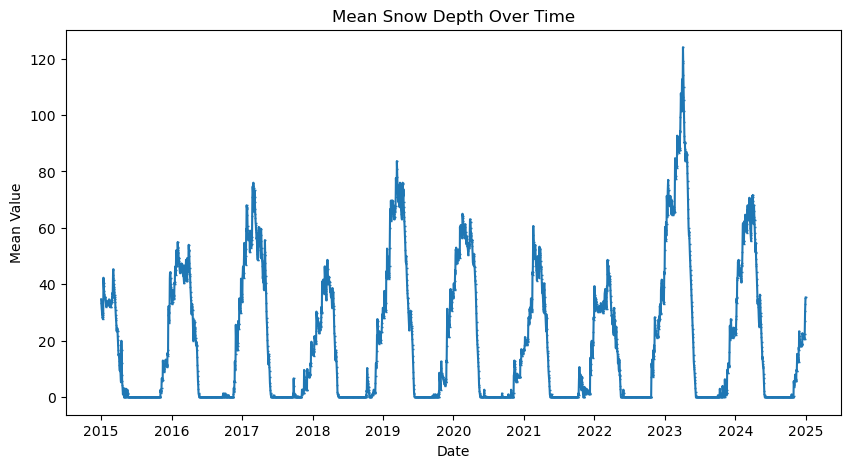

In [25]:
#Time Series Plot

time_series_mean = snow_data.groupby('date')['snowdepth'].mean()
plt.figure(figsize=(10, 5))
plt.plot(time_series_mean, marker='_', markersize= 1)
plt.title('Mean Snow Depth Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

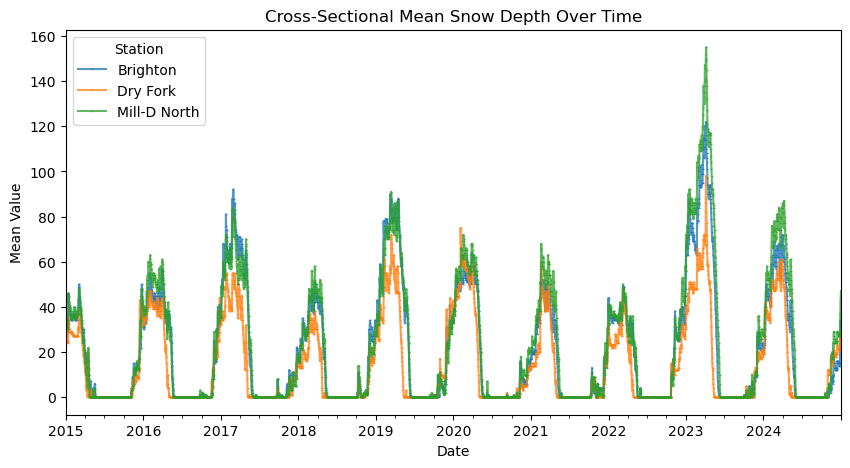

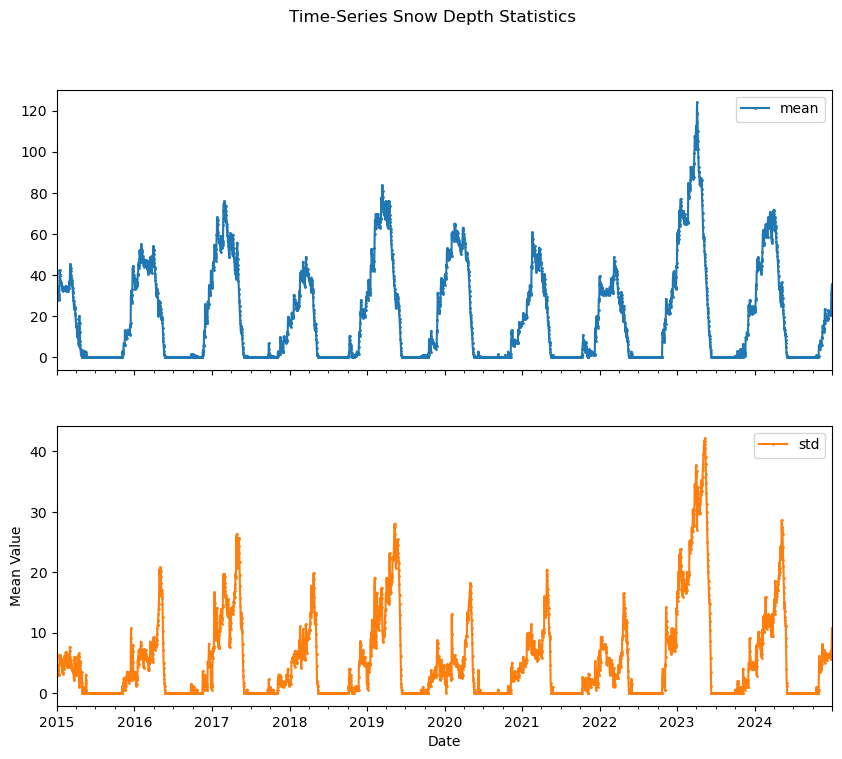

In [26]:
#Panel Data Plot

# Cross-sectional summary statistics over time
cross_sectional_stats = snow_data.groupby(['date', 'station_name'])['snowdepth'].mean().unstack()
cross_sectional_stats.plot(figsize=(10, 5), marker='_', markersize =1, alpha = 0.75)
plt.title('Cross-Sectional Mean Snow Depth Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.legend(title='Station')
plt.show()

# Time-series statistics across the population
time_series_stats = snow_data.groupby('date')['snowdepth'].agg(['mean', 'std'])
time_series_stats.plot(subplots=True, figsize=(10, 8), marker='o', markersize = 1)
plt.suptitle('Time-Series Snow Depth Statistics')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()


Using snow_data to display entire time series^^^

## Step two: Exploring relationships between each variable and the target 

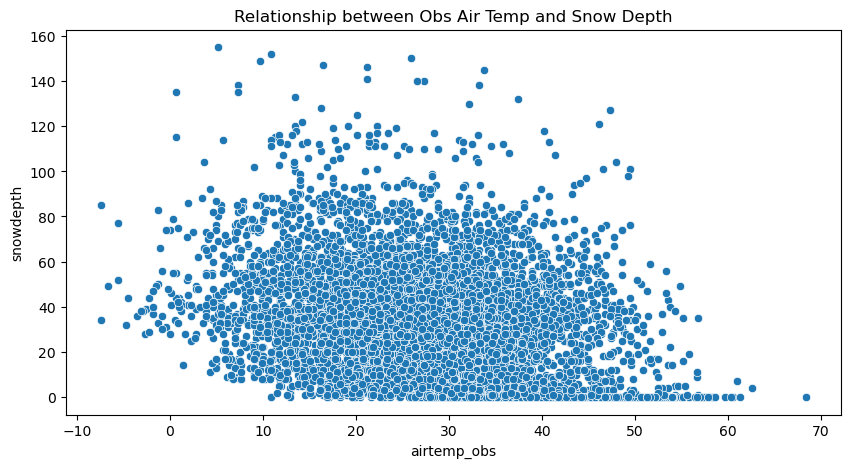

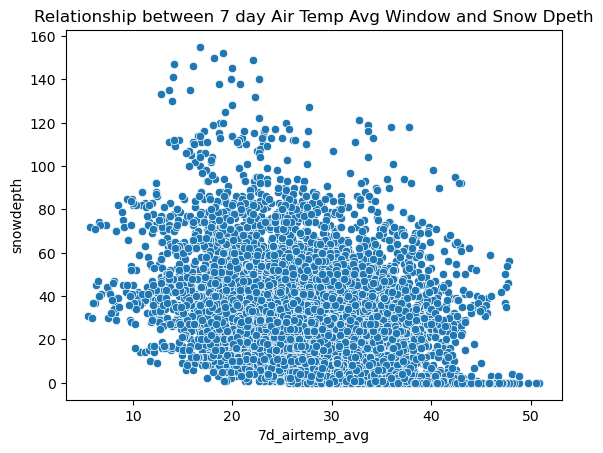

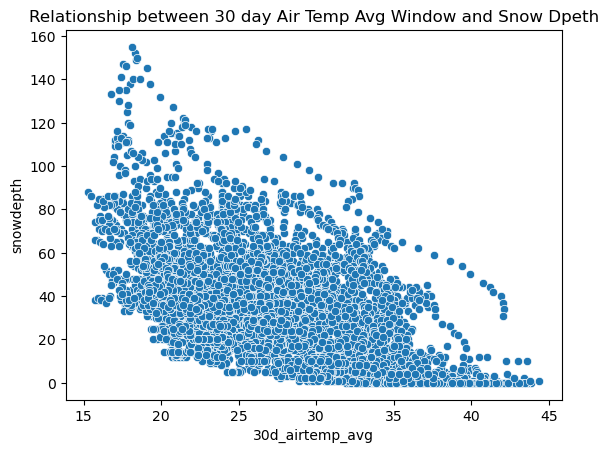

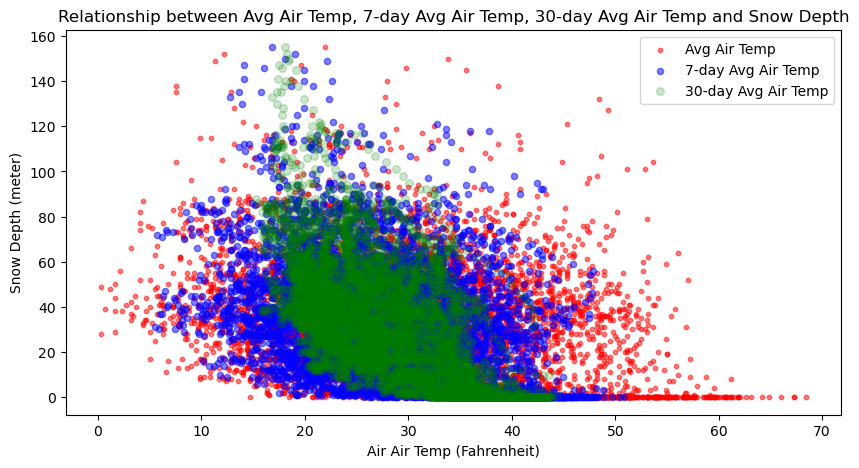

In [27]:
#Scatter plots 

#
plt.figure(figsize=(10, 5))
sns.scatterplot(x='airtemp_obs', y='snowdepth', data=winter_data)
plt.title('Relationship between Obs Air Temp and Snow Depth')
plt.show()

sns.scatterplot(x='7d_airtemp_avg', y='snowdepth', data=winter_data)
plt.title('Relationship between 7 day Air Temp Avg Window and Snow Dpeth')
plt.show()

sns.scatterplot(x='30d_airtemp_avg', y='snowdepth', data=winter_data)
plt.title('Relationship between 30 day Air Temp Avg Window and Snow Dpeth')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(winter_data['airtemp_avg'], winter_data['snowdepth'], color ='red', label='Avg Air Temp', s=10, alpha=0.5)
plt.scatter(winter_data['7d_airtemp_avg'], winter_data['snowdepth'], color ='blue', label='7-day Avg Air Temp', s=20, alpha=0.5)
plt.scatter(winter_data['30d_airtemp_avg'], winter_data['snowdepth'], color ='green', label='30-day Avg Air Temp', s=30, alpha=0.2)
plt.xlabel('Air Air Temp (Fahrenheit)')
plt.ylabel('Snow Depth (meter)')
plt.title('Relationship between Avg Air Temp, 7-day Avg Air Temp, 30-day Avg Air Temp and Snow Depth')
plt.legend()
plt.show()


In [ ]:
#What windows are relevant and should be considered? 

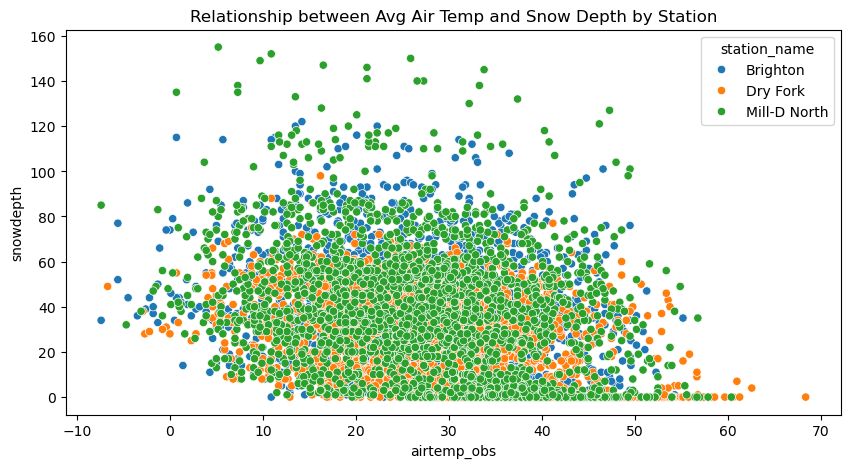

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='airtemp_obs', y='snowdepth', hue = 'station_name', data=winter_data)
plt.title('Relationship between Avg Air Temp and Snow Depth by Station')
plt.show()


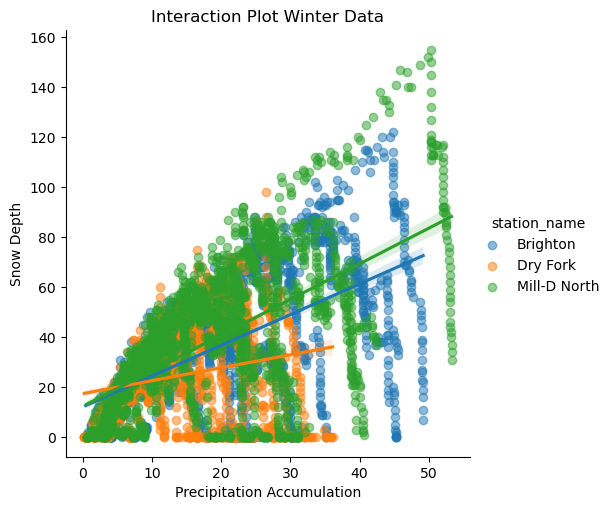

In [29]:
sns.lmplot(x='precip_accumulation', y='snowdepth', hue='station_name', data=winter_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Precipitation Accumulation')
plt.ylabel('Snow Depth')
plt.title('Interaction Plot Winter Data')
plt.show()

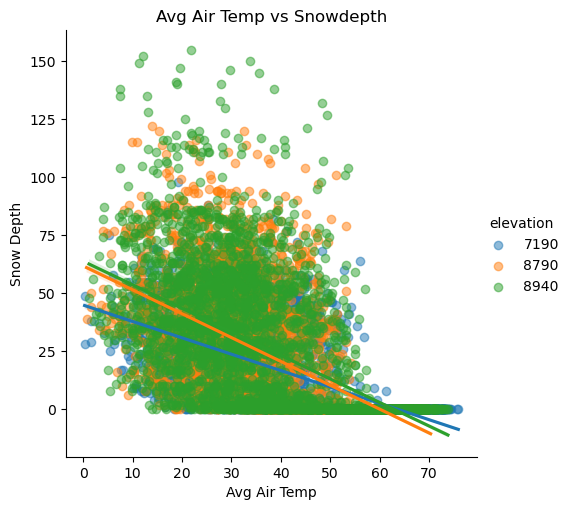

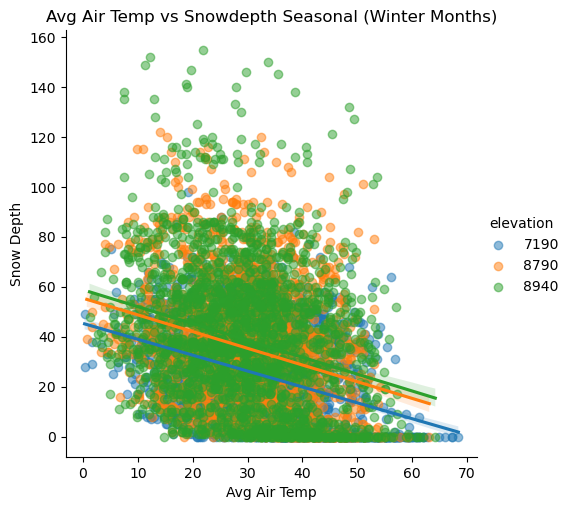

In [37]:
sns.lmplot(x='airtemp_avg', y='snowdepth', hue='elevation', data=snow_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Avg Air Temp')
plt.ylabel('Snow Depth')
plt.title('Avg Air Temp vs Snowdepth')
plt.show()

sns.lmplot(x='airtemp_avg', y='snowdepth', hue='elevation', data=winter_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Avg Air Temp')
plt.ylabel('Snow Depth')
plt.title('Avg Air Temp vs Snowdepth Seasonal (Winter Months)')
plt.show()

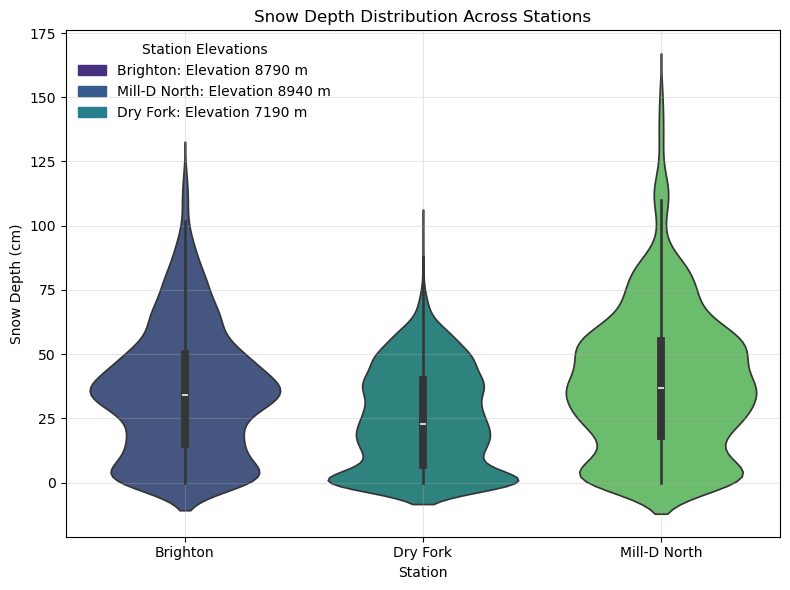

In [33]:
import matplotlib.patches as mpatches

# Violin plot
plt.figure(figsize=(8, 6))
plot = sns.violinplot(x="station_name", y="snowdepth", data=winter_data, hue= "station_name", palette="viridis")
plt.title("Snow Depth Distribution Across Stations")
plt.xlabel("Station")
plt.ylabel("Snow Depth (cm)")
plt.grid(alpha=0.3)

custom_legend = [
    mpatches.Patch(color=sns.color_palette("viridis")[0], label="Brighton: Elevation 8790 m"),
    mpatches.Patch(color=sns.color_palette("viridis")[1], label="Mill-D North: Elevation 8940 m"),
    mpatches.Patch(color=sns.color_palette("viridis")[2], label="Dry Fork: Elevation 7190 m")
]
plt.legend(handles=custom_legend, title="Station Elevations", loc="upper left", frameon=False)

plt.tight_layout()
plt.show()

### Assessing interactions between variables:



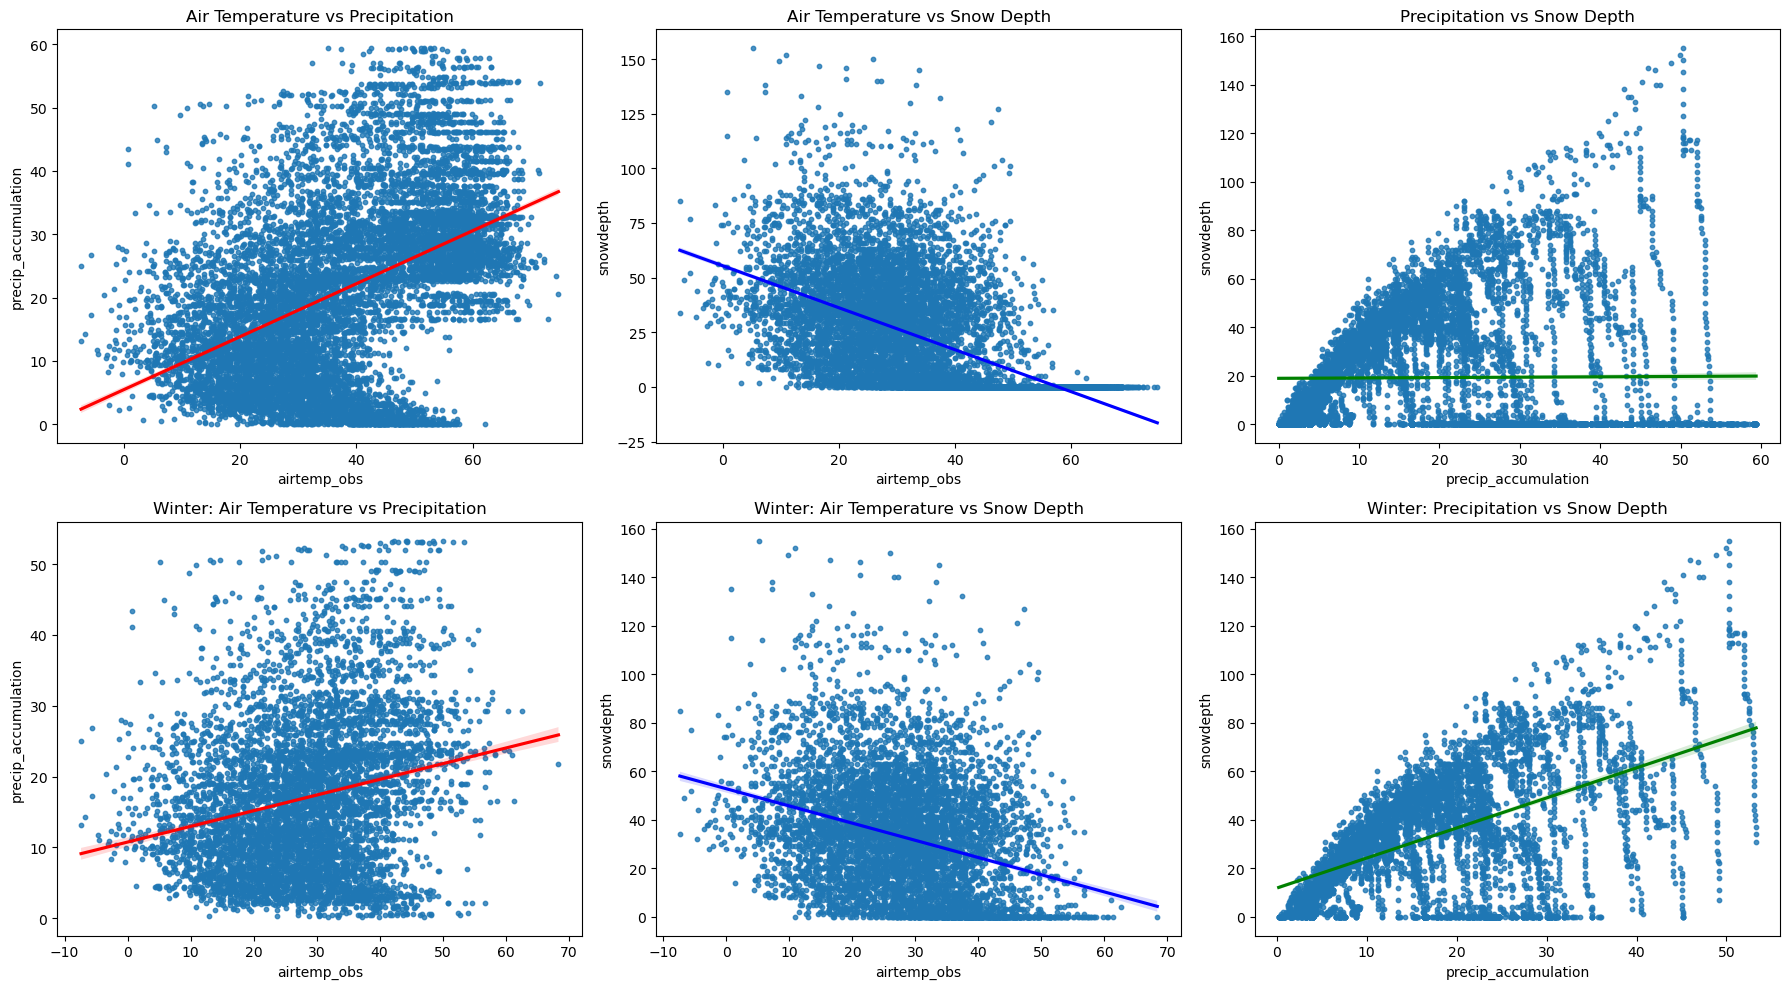

In [31]:
#Step three:  Assessing  interactions  between  variables  
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows and 3 columns

# Scatter plot between Air Temperature and Precipitation
sns.regplot(x='airtemp_obs', y='precip_accumulation', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axs[0, 0])
axs[0, 0].set_title('Air Temperature vs Precipitation')

# Scatter plot between Air Temperature and Snow Depth
sns.regplot(x='airtemp_obs', y='snowdepth', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'blue'}, ax=axs[0, 1])
axs[0, 1].set_title('Air Temperature vs Snow Depth')

# Scatter plot between Precipitation and Snow Depth
sns.regplot(x='precip_accumulation', y='snowdepth', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'green'}, ax=axs[0, 2])
axs[0, 2].set_title('Precipitation vs Snow Depth')

# Scatter plots with only winter months
sns.regplot(x='airtemp_obs', y='precip_accumulation', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axs[1, 0])
axs[1, 0].set_title('Winter: Air Temperature vs Precipitation')

# Scatter plot between Air Temperature and Snow Depth
sns.regplot(x='airtemp_obs', y='snowdepth', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'blue'}, ax=axs[1, 1])
axs[1, 1].set_title('Winter: Air Temperature vs Snow Depth')

# Scatter plot between Precipitation and Snow Depth
sns.regplot(x='precip_accumulation', y='snowdepth', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'green'}, ax=axs[1, 2])
axs[1, 2].set_title('Winter: Precipitation vs Snow Depth')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


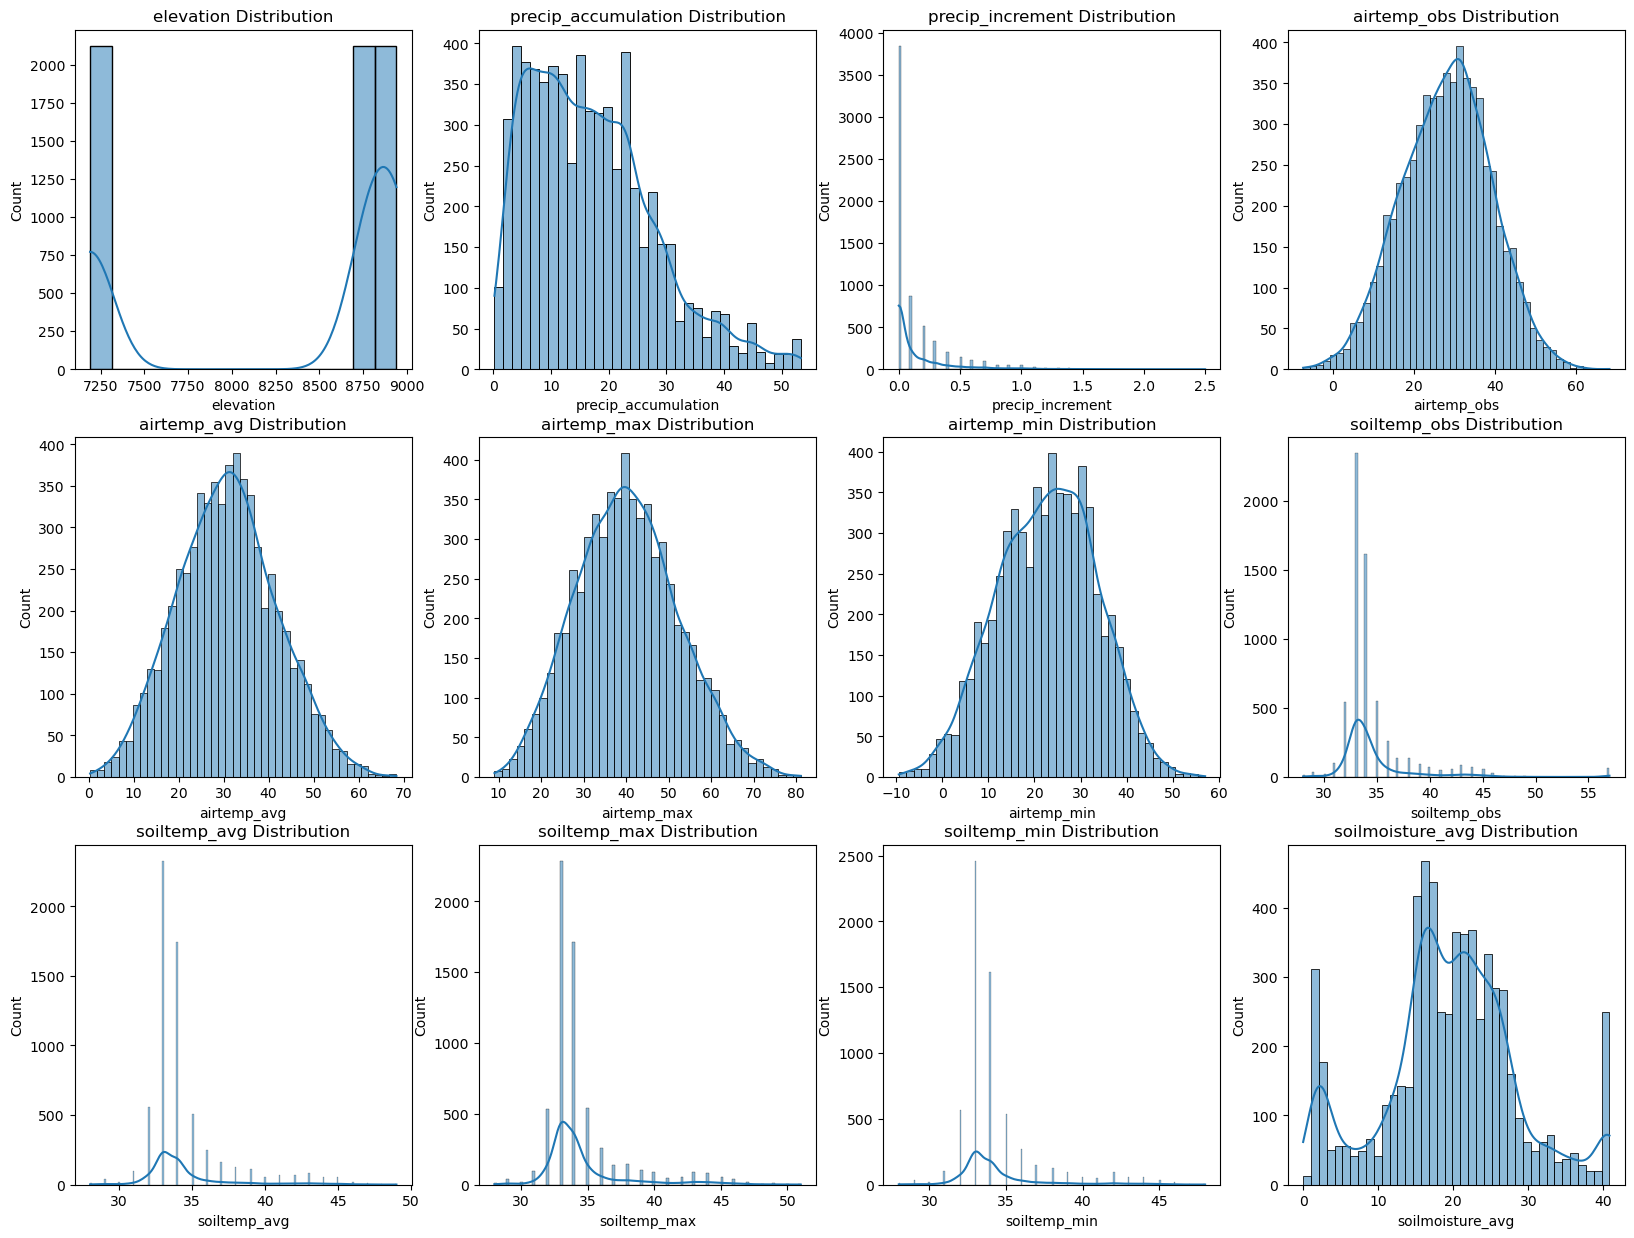

In [32]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
features = ['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg']

for i, feature in enumerate(features):
    ax = axs[i // 4, i % 4]  # Calculate subplot location
    sns.histplot(winter_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

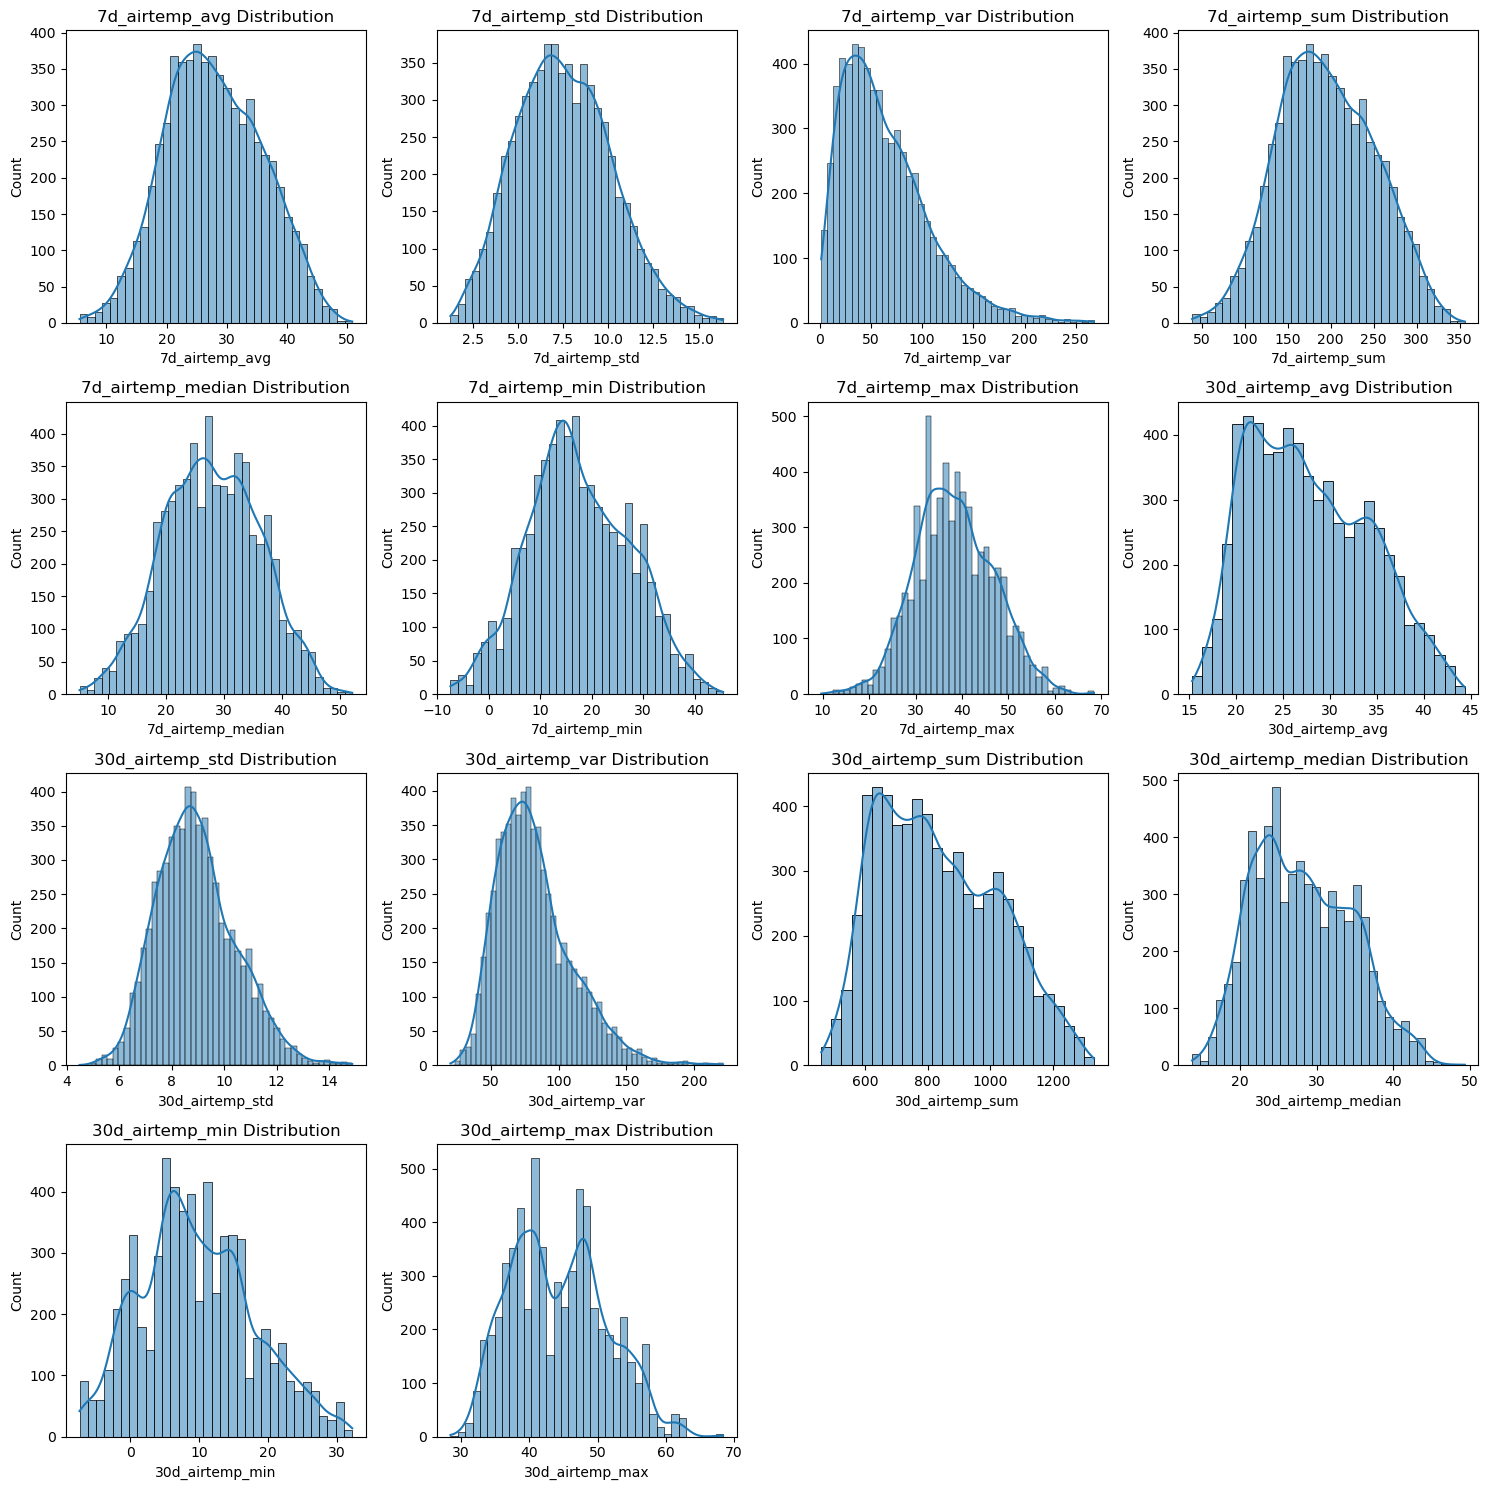

In [33]:
#Distribution for Air Temperature Statistics 7-day and 30-day windows

fig, axs = plt.subplots(4, 4, figsize=(15, 15))
additional_features = ['7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max' ]

axs= axs.flatten()

for i, feature in enumerate(additional_features):
    ax = axs[i]  # Calculate subplot location
    sns.histplot(winter_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

for j in range(i +1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [36]:
#Correlation Matrix
df_numeric = winter_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

corr_matrix = df_numeric.corr().round(2)
display(corr_matrix)

elevation  latitude  longitude  snowdepth  \
elevation                  1.00      0.82       0.99       0.24   
latitude                   0.82      1.00       0.72       0.22   
longitude                  0.99      0.72       1.00       0.23   
snowdepth                  0.24      0.22       0.23       1.00   
precip_accumulation        0.21      0.16       0.21       0.54   
precip_increment           0.07      0.06       0.07       0.14   
airtemp_avg               -0.12     -0.11      -0.11      -0.32   
airtemp_max               -0.15     -0.14      -0.14      -0.30   
airtemp_min               -0.08     -0.05      -0.08      -0.30   
airtemp_obs               -0.09     -0.07      -0.09      -0.31   
soiltemp_obs              -0.03      0.09      -0.06      -0.39   
soilmoisture_avg           0.22     -0.05       0.28       0.01   
soilmoisture_max           0.21     -0.06       0.27       0.00   
soilmoisture_min           0.22     -0.05       0.29       0.01   
soiltemp_avg              -0.10      0.01      -0.12      -0.45   
soiltemp_max              -0.10      0.00      -0.13      -0.46   
soiltemp_min              -0.09      0.02      -0.12      -0.44   
7d_airtemp_avg            -0.13     -0.10      -0.13      -0.42   
7d_precip_avg              0.21      0.16       0.21       0.52   
7d_snowdepth_avg           0.24      0.22       0.23       0.99   
7d_soiltemp_avg           -0.03      0.10      -0.06      -0.41   
30d_airtemp_avg           -0.16     -0.12      -0.16      -0.63   
30d_precip_avg             0.20      0.15       0.20       0.48   
30d_snowdepth_avg          0.23      0.21       0.22       0.91   
30d_soiltemp_avg           0.01      0.14      -0.03      -0.44   
7d_airtemp_std             0.03      0.03       0.03       0.05   
7d_precip_std              0.12      0.10       0.12       0.40   
7d_snowdepth_std           0.16      0.15       0.16       0.41   
7d_soiltemp_std           -0.15     -0.07      -0.17      -0.50   
30d_airtemp_std            0.08      0.11       0.07       0.02   
30d_precip_std             0.21      0.18       0.21       0.60   
30d_snowdepth_std          0.12      0.11       0.11       0.21   
30d_soiltemp_std          -0.15     -0.04      -0.17      -0.59   
7d_airtemp_var             0.02      0.02       0.02       0.04   
7d_precip_var              0.10      0.08       0.10       0.36   
7d_snowdepth_var           0.09      0.08       0.08       0.30   
7d_soiltemp_var           -0.09     -0.02      -0.10      -0.32   
30d_airtemp_var            0.08      0.11       0.07       0.01   
30d_precip_var             0.19      0.16       0.19       0.58   
30d_snowdepth_var          0.09      0.09       0.08       0.11   
30d_soiltemp_var          -0.08      0.03      -0.11      -0.45   
7d_airtemp_sum            -0.13     -0.10      -0.13      -0.42   
7d_precip_sum              0.21      0.16       0.21       0.52   
7d_snowdepth_sum           0.24      0.22       0.23       0.99   
7d_soiltemp_sum           -0.03      0.10      -0.06      -0.41   
30d_airtemp_sum           -0.16     -0.12      -0.16      -0.63   
30d_precip_sum             0.20      0.15       0.20       0.48   
30d_snowdepth_sum          0.23      0.21       0.22       0.91   
30d_soiltemp_sum           0.01      0.14      -0.03      -0.44   
7d_airtemp_median         -0.11     -0.08      -0.11      -0.39   
7d_precip_median           0.21      0.16       0.21       0.52   
7d_snowdepth_median        0.24      0.22       0.23       0.98   
7d_soiltemp_median        -0.03      0.10      -0.06      -0.40   
30d_airtemp_median        -0.13     -0.10      -0.13      -0.60   
30d_precip_median          0.20      0.15       0.20       0.48   
30d_snowdepth_median       0.23      0.21       0.22       0.90   
30d_soiltemp_median        0.02      0.14      -0.02      -0.40   
7d_airtemp_min            -0.13     -0.10      -0.13      -0.37   
7d_precip_min              0.21      0.16       0.21       0.51   
7d

In [37]:
winter_numeric = winter_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = winter_numeric.corr()
print(corr_matrix['snowdepth'].sort_values(ascending=False))

snowdepth               1.000000
7d_snowdepth_avg        0.986939
7d_snowdepth_sum        0.986939
7d_snowdepth_max        0.986586
7d_snowdepth_median     0.984177
7d_snowdepth_min        0.980411
30d_snowdepth_min       0.919484
30d_snowdepth_sum       0.909137
30d_snowdepth_avg       0.909137
30d_snowdepth_median    0.896685
30d_snowdepth_max       0.878822
30d_precip_std          0.601536
30d_precip_var          0.581179
30d_precip_max          0.535605
7d_precip_max           0.535449
precip_accumulation     0.535389
7d_precip_avg           0.522497
7d_precip_sum           0.522497
7d_precip_median        0.521962
7d_precip_min           0.509482
30d_precip_sum          0.481690
30d_precip_avg          0.481690
30d_precip_median       0.478073
30d_precip_min          0.430888
7d_snowdepth_std        0.408360
7d_precip_std           0.395496
7d_precip_var           0.356288
7d_snowdepth_var        0.302903
elevation               0.238129
longitude               0.228360
latitude  

## Correlation Analysis of Snow Depth Metrics

### **Strong Positive Correlations**
- **7-day Snow Depth Metrics**:
  - **7d_snowdepth_avg (0.988)**, **7d_snowdepth_sum (0.988)**, and **7d_snowdepth_max (0.988)** show extremely strong correlations.
  - This indicates that short-term (7-day) snow depth metrics are closely tied to the snow depth.
- **30-day Snow Depth Metrics**:
  - **30d_snowdepth_min (0.923)**, **30d_snowdepth_avg (0.916)**, and similar features also demonstrate strong correlations, though slightly weaker than the 7-day metrics.

---

### **Moderate Positive Correlations**
- **Precipitation Variables**:
  - Metrics like **30d_precip_std (0.620)**, **30d_precip_max (0.589)**, and **precip_accumulation (0.589)** show moderate positive correlations.
- **Geographical Variables**:
  - **Latitude (0.239)**, **elevation (0.236)**, and **longitude (0.209)** suggest a weak-to-moderate geographical influence on snow depth.

---

### **Weak Positive or Negligible Correlations**
- **Precipitation Increment**:
  - **Precip Increment (0.149)** shows a weak correlation, indicating that small incremental precipitation changes alone may not strongly predict snow depth without other contributing factors.
- **Soil Moisture Variables**:
  - Metrics like **soilmoisture_avg (0.073)** exhibit very weak positive correlations, likely because soil moisture impacts snowmelt rather than snow accumulation.

---

### **Negative Correlations**
- **Air Temperature Features**:
  - Metrics such as **airtemp_avg (-0.279)** and **airtemp_max (-0.271)** show negative correlations. Higher temperatures reduce snow depth through snowmelt or precipitation falling as rain instead of snow.
- **Soil Temperature Variables**:
  - Features like **soiltemp_avg (-0.443)** and **soiltemp_max (-0.454)** also exhibit negative correlations, likely due to increased snowmelt or reduced snowpack retention caused by higher soil temperatures.

---

### **7-Day Metrics vs. 30-Day Metrics**
- **Stronger Correlations for 7-Day Metrics**:
  - Short-term metrics such as **7d_snowdepth_avg**, **7d_snowdepth_sum**, and **7d_snowdepth_max** exhibit stronger correlations with snow depth compared to 30-day metrics.
  - This indicates that **recent conditions** have a greater influence on snow depth than longer-term trends.

---

### **Soil and Air Temperature**
- **Consistent Negative Correlations**:
  - Both **soil** and **air temperature** features consistently show negative correlations with snow depth.
  - **Stronger Impact of Soil Temperature**:
    - Soil temperature demonstrates a slightly stronger negative relationship than air temperature, highlighting its **critical role in snowmelt**.

---

### **Precipitation**
- **Moderate Positive Correlations**:
  - Precipitation variables such as **30d_precip_std**, **30d_precip_max**, and **precip_accumulation** show moderate correlations with snow depth.
  - While precipitation is an important factor for snow depth predictions, its impact is **not as strong** as snow depth-specific features like 7-day metrics.

---



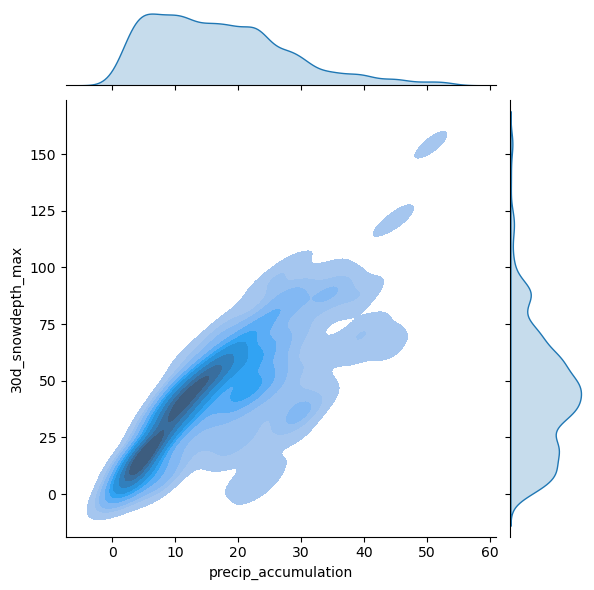

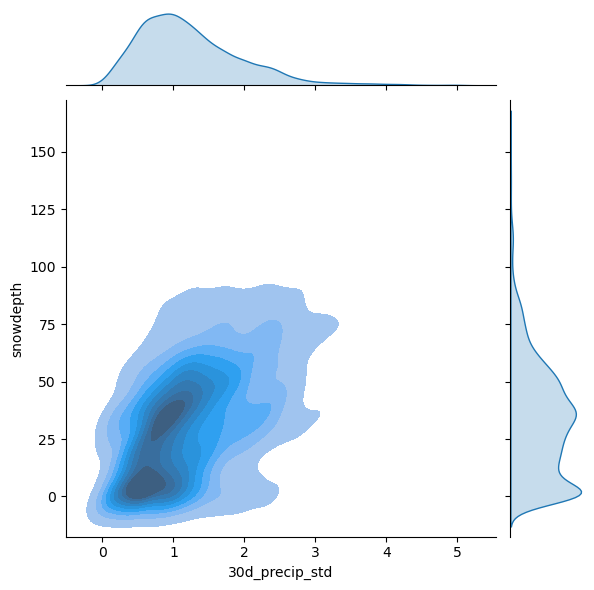

In [38]:
#Interaction of notable correlation Precipitation Accumulation vs 30d Snowdepth Max (0.82)	
#sns.jointplot(x='precip_accumulation', y='snowdepth', data=winter_data, kind='scatter', color='blue')
#plt.show()

# KDE example
sns.jointplot(x='precip_accumulation', y='30d_snowdepth_max', data=winter_data, kind='kde', fill=True)

#Snowdepth vs 30d_precip_std (0.620)
sns.jointplot(x='30d_precip_std', y='snowdepth', data=winter_data, kind='kde', fill=True)

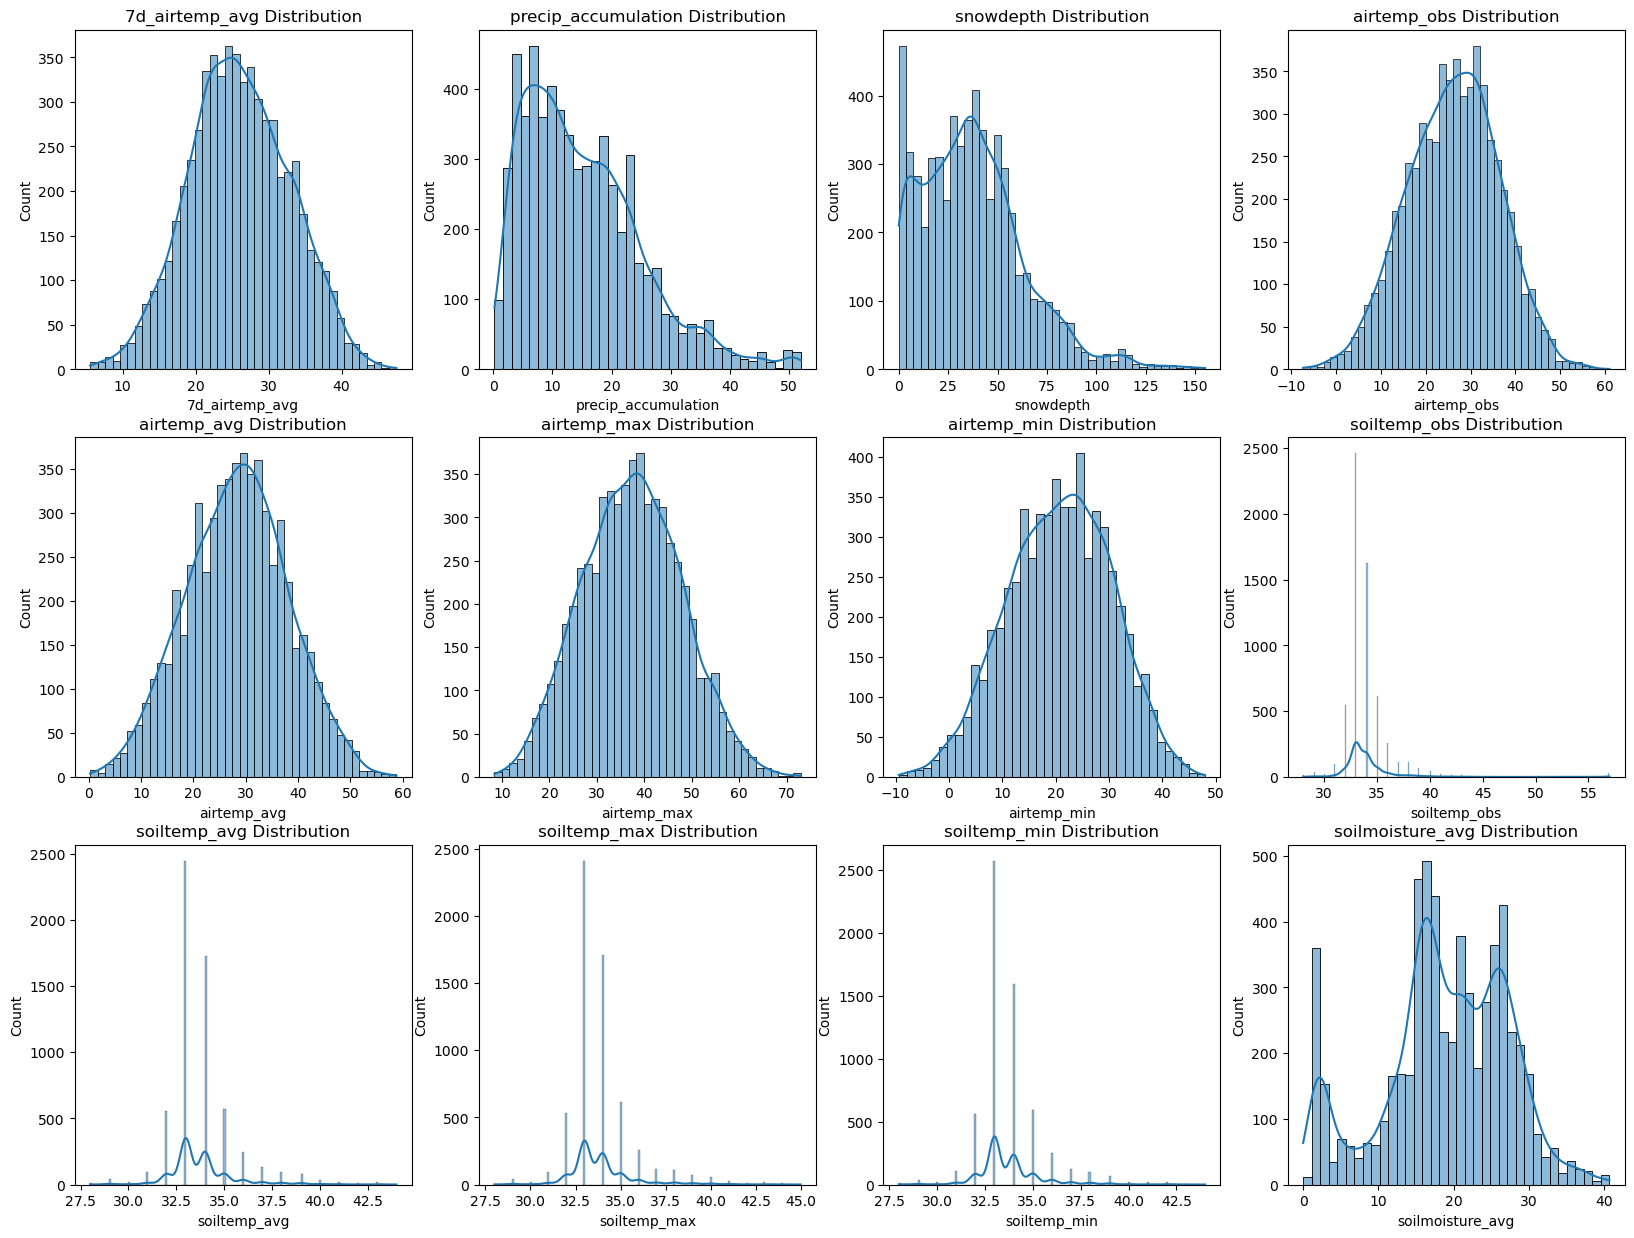

In [155]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
features = ['7d_airtemp_avg', 'precip_accumulation', 'snowdepth', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg']

for i, feature in enumerate(features):
    ax = axs[i // 4, i % 4]  # Calculate subplot location
    sns.histplot(winter_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

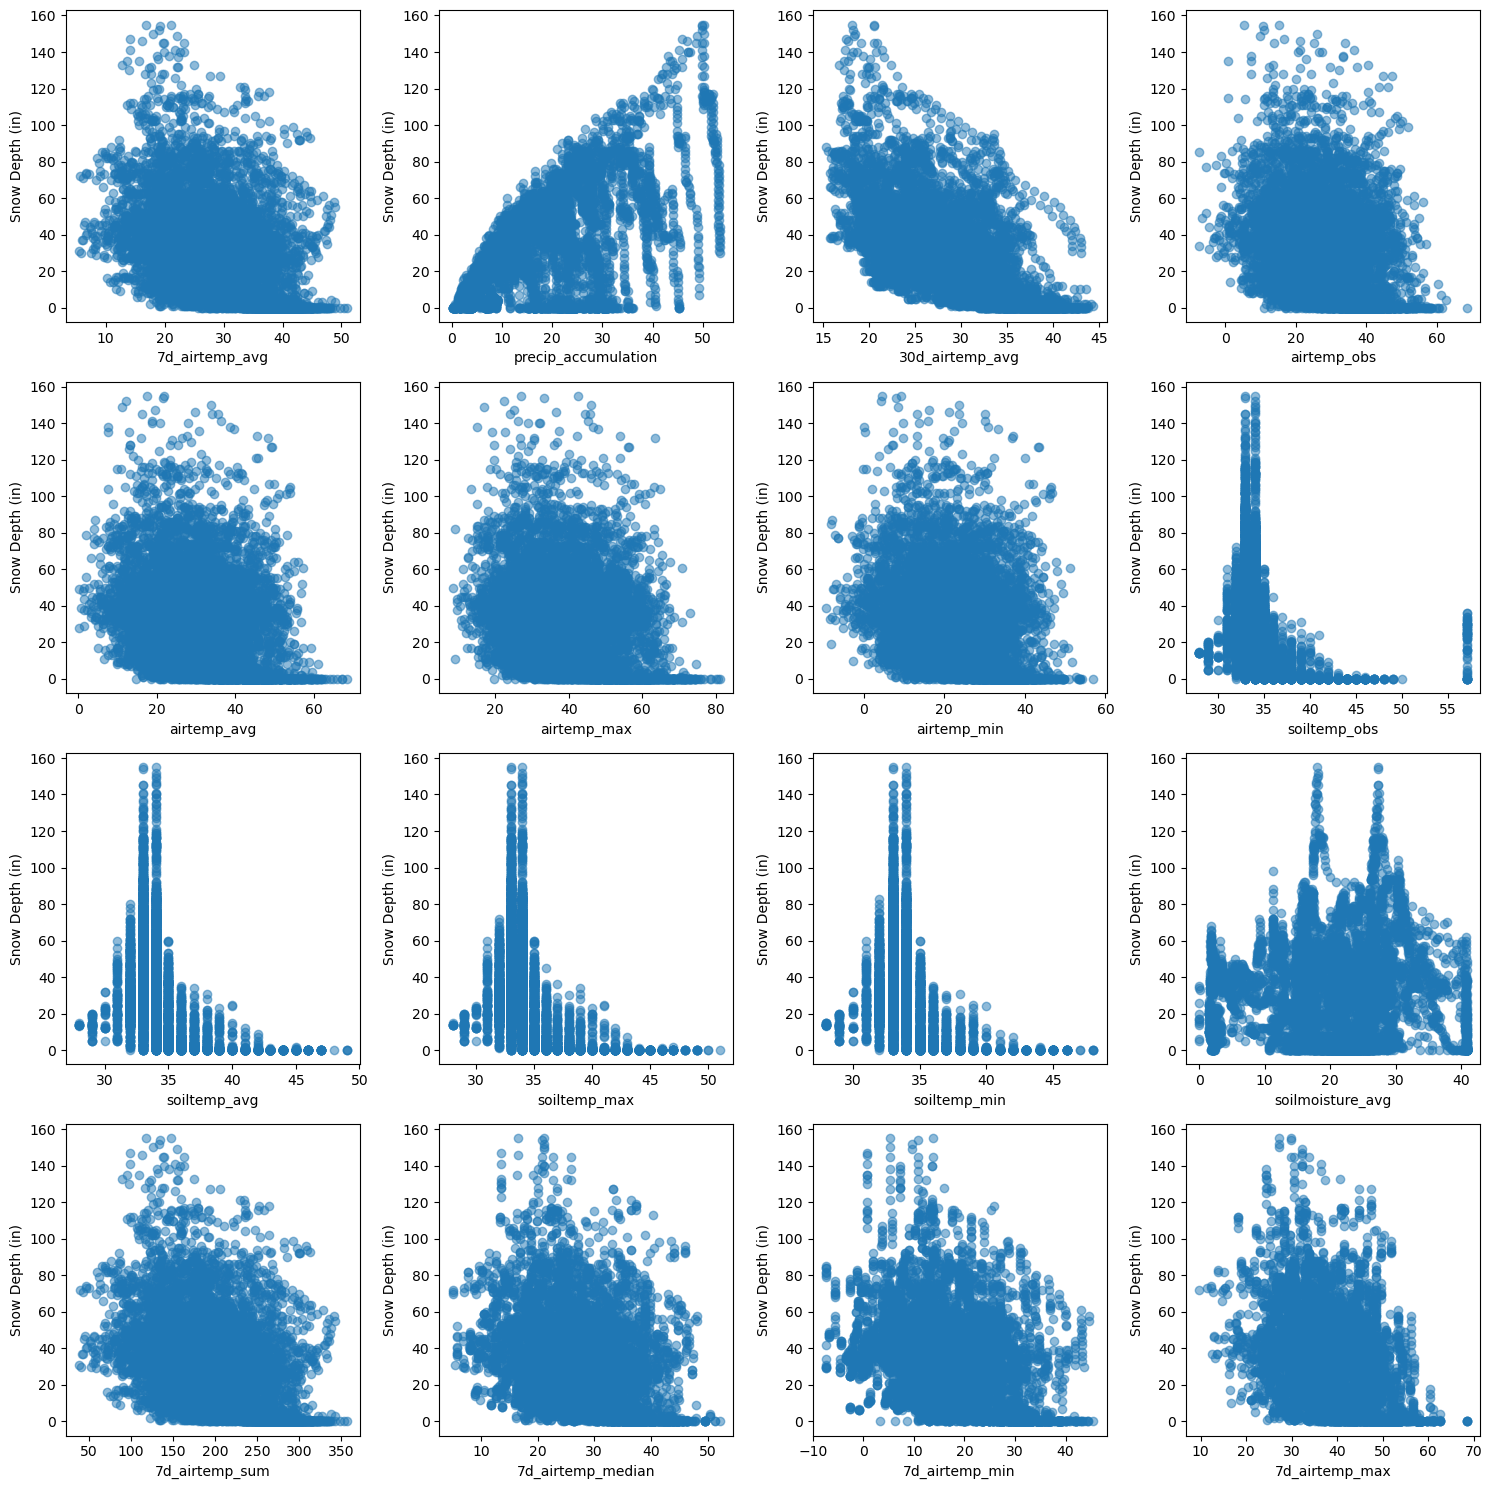

In [133]:
features = ['7d_airtemp_avg', 'precip_accumulation', '30d_airtemp_avg', 'airtemp_obs',
            'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs',
            'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg',
            '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max']

def scatterplots(columns, ncol=4, figsize=(15, 15)):
    nrow = (len(columns) + ncol - 1) // ncol  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes for easier indexing

    for i, col in enumerate(columns):
        axes[i].scatter(winter_data[col], winter_data['snowdepth'], alpha=0.5)
        axes[i].set(xlabel=col, ylabel='Snow Depth (in)')
    
    # Turn off any extra blank subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    fig.tight_layout()
    plt.show()


scatterplots(features, ncol=4, figsize=(15, 15))


## Step 4: Exploring data across many dimensions

In [53]:
#Step 4: Exploring data across many dimensions
X= winter_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year']]
y = winter_data['snowdepth']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Model with all features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
from sklearn.metrics import mean_squared_error, root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)


R-squared: 0.8057528470506345
RMSE: 11.038699815787796


Approximately 80% of the variation in snow depth is explained by the features in your model
RMSE of 11.03 suggests that, on average, the model's predictions are off by 11.03 cm of snow depth.

In [40]:
print(winter_data['snowdepth'].mean())

32.840163290940495


In [41]:
#Feature Selection Techniques: 
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
print("Selected Features:", X_train.columns[rfe.support_])


Selected Features: Index(['precip_increment', 'soiltemp_avg', 'soiltemp_max', '30d_airtemp_std',
       '30d_airtemp_max'],
      dtype='object')



### **Precipitation Increment**
- Reflects the impact of recent or short-term precipitation events on snow depth.
- Such events can **directly affect snow accumulation or melting**, depending on the temperature and intensity of precipitation.

---

### **Maximum Soil Temperature**
- Indicates how **warm the ground can get**, which has a direct impact on snowmelt.
- **Higher maximum soil temperatures** likely accelerate snowpack reduction, making this feature highly relevant for predicting snow depth changes.

---

### **Precipitation Dynamics and Ground Heat Flux**
- The interaction between **precipitation dynamics** (frequency and intensity of precipitation) and **ground heat flux** (heat transfer between the ground and snowpack) plays a crucial role in snow depth variations.
- These factors influence whether snow accumulates, melts, or sublimates, thereby affecting the stability and longevity of the snowpack.

---


In [42]:
#Principal Compoenent Analysis (PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_train)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.93856735 0.05473504 0.00314109 0.00185417 0.00095797]


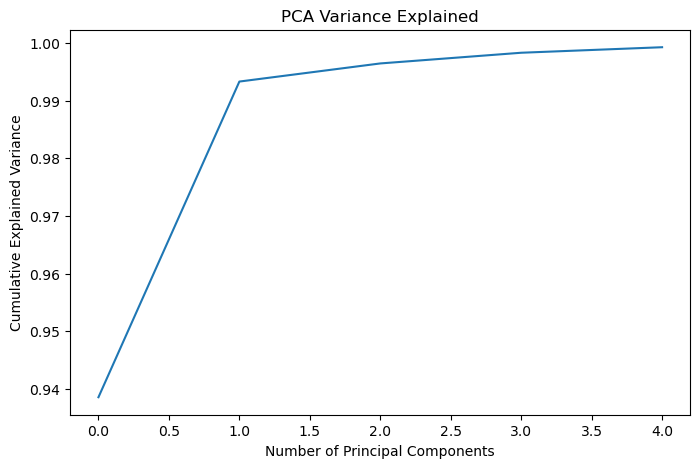

In [59]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.show()

First Principal Component (PC1):

Explains **93.85%** of the variance in the data.

This means the majority of the information or variability in your dataset can be captured by precipitation increment (component 1).

Second Principal Component (PC2):

Soil temp avg explains **5.96%** of the variance.

While PC2 contributes less information, it might still capture meaningful variability that PC1 misses.

PC3:5 >1% 

Since only the first two components capture nearly all the variance (99.33%), we might want to consider reducing the dimensionality of your data.


In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X_train.columns[i]}, Importance: {v}")


y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Use the dedicated function for RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

Feature: elevation, Importance: 0.0012621407269008732
Feature: precip_accumulation, Importance: 0.3106819260019886
Feature: precip_increment, Importance: 0.0006185673529231319
Feature: airtemp_obs, Importance: 0.0024679228506821675
Feature: airtemp_avg, Importance: 0.0021814095138066106
Feature: airtemp_max, Importance: 0.0017576720450097857
Feature: airtemp_min, Importance: 0.0019135852165731103
Feature: soiltemp_obs, Importance: 0.0033897074281800414
Feature: soiltemp_avg, Importance: 0.0018417886345386291
Feature: soiltemp_max, Importance: 0.047206660800995226
Feature: soiltemp_min, Importance: 0.0013043019467111052
Feature: soilmoisture_avg, Importance: 0.014450834409709342
Feature: 7d_airtemp_avg, Importance: 0.002936743242114783
Feature: 7d_airtemp_std, Importance: 0.0009514964421338395
Feature: 7d_airtemp_var, Importance: 0.0009303334419110379
Feature: 7d_airtemp_sum, Importance: 0.0034615805957445593
Feature: 7d_airtemp_median, Importance: 0.0029175190830593133
Feature: 7d_airt

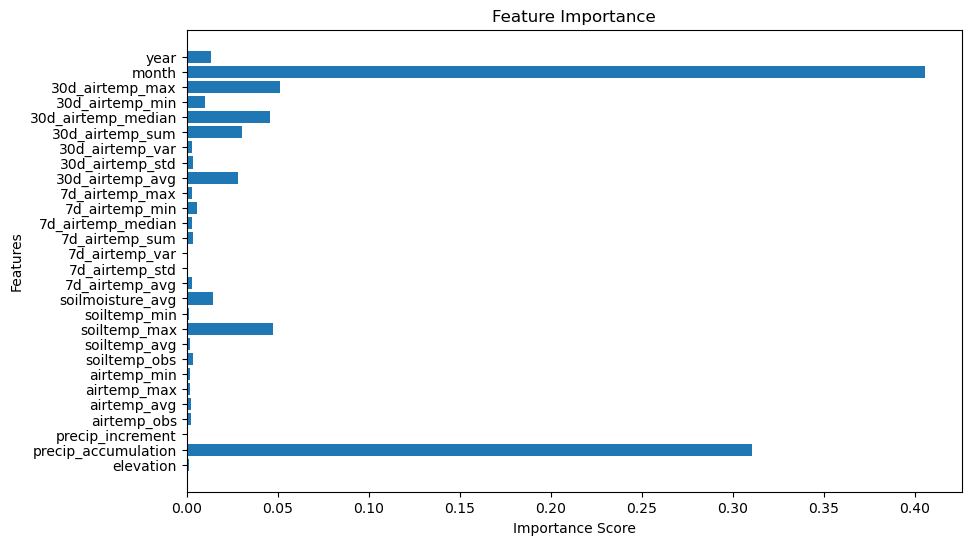

In [56]:
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Feature Importance Analysis for Snow Depth Prediction

### **Highly Important Features**
- **Month (0.389)**: 
  - Indicates that the month strongly influences the target variable (e.g., snow depth), likely due to **seasonal effects**.
- **Precipitation Accumulation (0.353)**:
  - Accumulated precipitation significantly impacts the target variable, aligning with its direct contribution to snowpack formation.
- **30d Air Temperature Metrics**:
  - **30d_airtemp_max (0.071)** and **30d_airtemp_median (0.061)**:
    - These metrics are crucial for understanding snow accumulation and melting patterns.
    - Maximum and median temperatures likely influence **snowmelt rates**.

---

### **Moderately Important Features**
- **30d Air Temperature Metrics**:
  - **30d_airtemp_avg (0.017)** and **30d_airtemp_sum (0.017)**:
    - Summarize broader air temperature trends and help capture sustained effects over time.
  - **30d_airtemp_min (0.013)**:
    - Minimum air temperatures are critical for determining whether precipitation falls as **snow or rain**.
- **Soil Moisture**:
  - **soilmoisture_avg (0.012)**: Reflects conditions influencing **snow retention or melting**.
- **Year (0.016)**:
  - Less significant than monthly trends, but may capture **long-term patterns or climatic shifts**.

---

### **Less Important Features**
- **Elevation (0.005)**: 
  - While elevation influences snowfall and temperature distribution, its low importance here suggests **limited variability** in the dataset.
- **Maximum Soil Temperature (0.005)**: 
  - Shows a mild effect, likely related to **snowmelt** dynamics.

---

### **Other Soil/Air Temperature Variables**
- **Air Temperature and Soil Temperature**:
  - Metrics like **airtemp_obs (0.0017)** and **soiltemp_avg (0.0011)** contribute minimally to predictions, suggesting they are **secondary effects** compared to broader metrics like **30d_airtemp_max**.
- **Precipitation Increment (0.0006)**: 
  - Short-term precipitation changes have minimal impact here compared to **cumulative precipitation**.

---

### **Model Insights**
- The model relies most heavily on **temporal features** such as **month**, **precip_accumulation**, and **30d_airtemp_max**, reflecting the **importance of seasonality**.
- **Recommendation**: Consider eliminating features with very low importance (e.g., **precip_increment**, **soiltemp_avg**) to reduce model complexity and improve efficiency.
- Model 

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


C:\DataScience\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


               Features           VIF
0             elevation  1.620766e+02
1   precip_accumulation  6.869615e+00
2      precip_increment  1.523690e+00
3           airtemp_obs  4.349831e+01
4           airtemp_avg  4.326356e+02
5           airtemp_max  2.372085e+02
6           airtemp_min  8.893559e+01
7          soiltemp_obs  2.703975e+02
8          soiltemp_avg  3.112371e+04
9          soiltemp_max  1.135417e+04
10         soiltemp_min  1.623664e+04
11     soilmoisture_avg  9.959945e+00
12       7d_airtemp_avg           inf
13       7d_airtemp_std  3.748919e+02
14       7d_airtemp_var  7.621579e+01
15       7d_airtemp_sum           inf
16    7d_airtemp_median  2.895241e+02
17       7d_airtemp_min  1.605659e+02
18       7d_airtemp_max  5.753105e+02
19      30d_airtemp_avg           inf
20      30d_airtemp_std  3.305380e+03
21      30d_airtemp_var  8.203211e+02
22      30d_airtemp_sum           inf
23   30d_airtemp_median  6.228467e+02
24      30d_airtemp_min  2.048777e+01
25      30d_

## Issues with Multicollinearity

### **High VIF (Variance Inflation Factor)**
- **Extremely High VIF Values**:
  - Features like **soiltemp_avg (31,123.71)** and **soiltemp_max (11,354.17)**, along with others marked as **inf**, indicate **severe multicollinearity**.
  - These extreme values suggest these features are either:
    1. **Strongly correlated with other features**, or
    2. **Collinear with themselves**.
- **7-Day and 30-Day Air Temperature Metrics**:
  - Features such as **7d_airtemp_avg**, **7d_airtemp_sum**, **30d_airtemp_avg**, and **30d_airtemp_sum**, which have **inf** VIF values, likely represent **perfect or near-perfect linear relationships** with each other or other features in the dataset.

---

### **Moderate VIF**
- Features like **elevation (162.08)** and **airtemp_max (237.21)** have **high but not extreme VIFs**.
- These features might still contribute to multicollinearity and should be reviewed for potential redundancy or overlap with other variables.

---

### **Low VIF**
- Features such as **precip_increment (1.52)** and **month (4.99)** fall within an **acceptable range**, indicating little to no multicollinearity.
- These features can be retained without issues.

---

## Feature Removal Plan to Address Multicollinearity

1. **Retain Key Features**:
   - Keep features such as:
     - **precip_increment**, **soiltemp_avg**, **30d_airtemp_max**, and **month**, as they are **critical** based on either Recursive Feature Elimination (RFE) or low VIF values.

2. **Drop Redundant Features**:
   - Remove **soiltemp_min** and **soiltemp_max**, as they are likely redundant with **soiltemp_avg** and contribute to multicollinearity.

3. **Consolidate Air Temperature Features**:
   - Eliminate or combine **7-day** and **30-day air temperature features** with the highest VIFs (marked as **inf**).
   - Retain only those selected by RFE or those deemed essential for domain relevance.

---


Text(0.5, 1.0, 'Correlation Heatmap of Air Temperature Features')

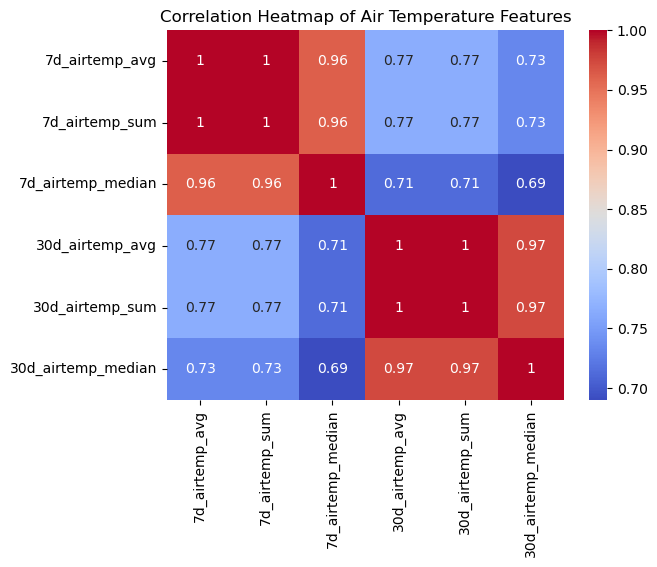

In [146]:
#Exploring the correlation between 7d vs 30d air temp windows

corr_matrix = X_train[['7d_airtemp_avg', '7d_airtemp_sum', '7d_airtemp_median',
                       '30d_airtemp_avg', '30d_airtemp_sum', '30d_airtemp_median']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Air Temperature Features')

## Correlation for 7d vs 30d metrics
- **Within-group Correlations**:
  - The 7d metrics are highly correlated with each other (~0.98–1.0).
  - Similarly, the 30d metrics are also highly correlated within their group (~0.87–0.91).
-  **Between-group Correlations**:
    - The correlations between 7d and 30d metrics are lower, often ranging from ~0.87 to 0.91.

---
- **Decision Framework** :
  - Potential to drop 7d metrics since we want to focus on broader, long-term snow depth trends.
  - On the other side, dropping 30d metrics if the model should prioritizes real-time or short-term predictions
      - Could immediate weather conditions have a larger influence on your target variable?


In [45]:
#Testing the model without soiltemp_min, soiltemp_max, 7d_airtemp_sum, 30d_airtemp_sum, 
X= winter_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year']]
y = winter_data['snowdepth']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model with all features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Use the dedicated function for RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)


R-squared: 0.7989565792221944
Root Mean Squared Error: 11.2301491673881


Performed slightly worse than original model, explaining 79% instead of 80% 

### Potential options for better progress: 
- Trying different algorithms (e.g., Random Forest, Gradient Boosting, SVM, Neural Network).
    
- Fine-tuning hyperparameters (e.g., regularization, learning rate, Bayesian, GridSearch, Random Search)

- Other feature engineering techniques?
    - Synthetic Features: Combine existing features (e.g., interaction of temperature and precipitation)
    - Lagged Features: Generate lagged versions of features (e.g., last week's average snow depth).

In [46]:
#Testing the model dropping 7d metrics
X= winter_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soilmoisture_avg', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max', 'month', 'year']]
y = winter_data['snowdepth']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model with all features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Use the dedicated function for RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)



R-squared: 0.7973680249555357
Root Mean Squared Error: 11.27442965051492


In [47]:
#Testing the model dropping 30d metrics
X= winter_data[['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soilmoisture_avg', '7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', 'month', 'year']]
y = winter_data['snowdepth']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model with all features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Use the dedicated function for RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)


R-squared: 0.7468283840924699
Root Mean Squared Error: 12.602250241502404


Disregarding both 7d and 30d metrics in seperte models results in lower R-squared values. 

In [48]:
import os

datapath = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data'
snow_data_eda = 'snow_data_cleaned.csv'
filepath = os.path.join(datapath, snow_data_eda)


snow_data.to_csv(filepath, index=False)
print(f"Data saved successfully to '{filepath}'")


Data saved successfully to 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data\snow_data_cleaned.csv'
